In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
ebola_df = pd.read_csv('Resources/ebola.csv')
ebola_df
#ebola_df.rename(columns={"Cumulative no. of confirmed, probable and suspected cases": "Cumulative cases", "Cumulative no. of confirmed, probable and suspected deaths": "Cumulative Deaths"})

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [3]:
#list of countries
ebola_df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

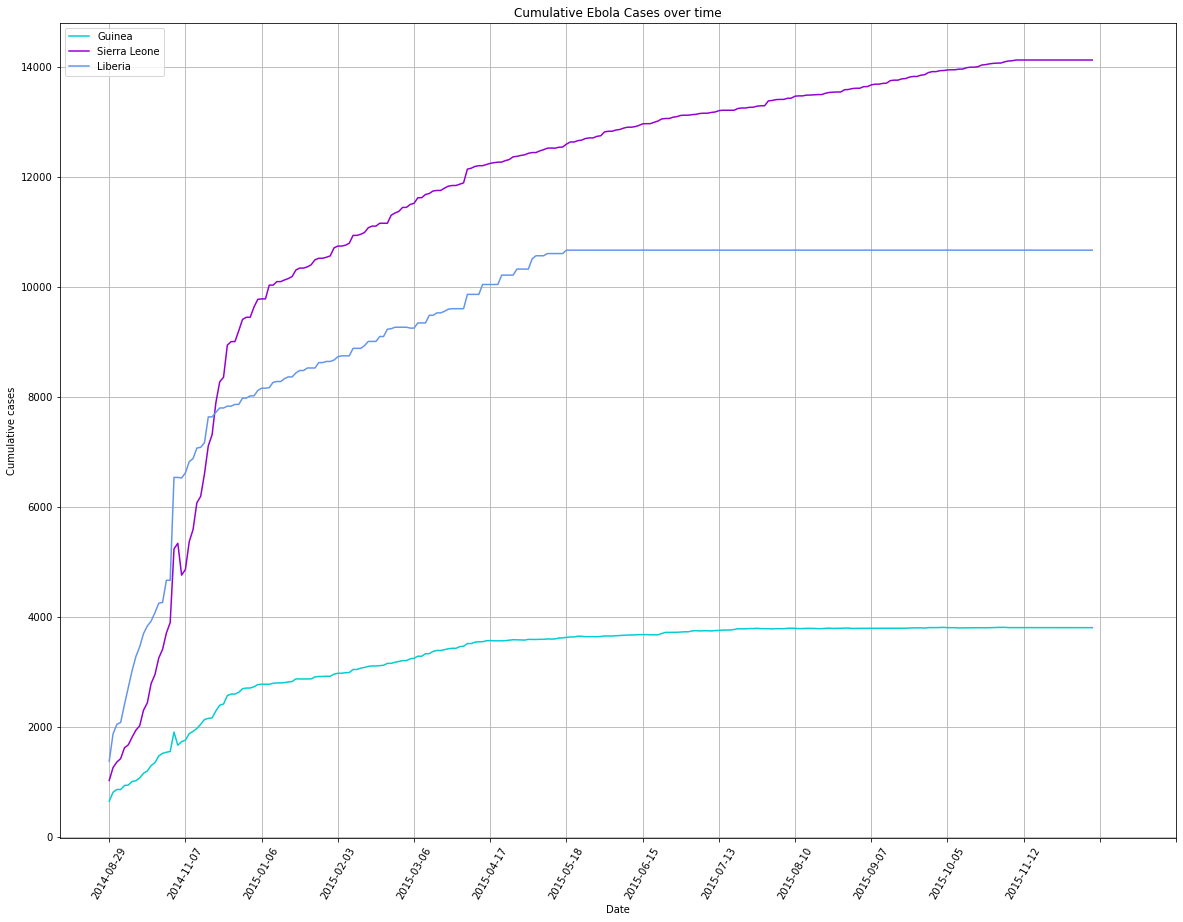

In [4]:
#Cumulative line graph of cases over time per country

#Countries with high number of cases
#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_cases= guinea_df["Cumulative no. of confirmed, probable and suspected cases"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_cases
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_cases= sierraleone_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_cases
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")

#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=1378]
liberia_cases= liberia_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis4=liberia_df["Date"]
y_axis4=liberia_cases
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")


plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Ebola Cases over time')

plt.xticks(np.arange(0, 300, step=20))
plt.xticks(rotation=60) 

plt.grid()
plt.show()


#Countries with low number of cases

# #Senegal
# senegal_df=ebola_df.loc[ebola_df["Country"]=="Senegal"]
# senegal_cases= senegal_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis5=senegal_df["Date"]
# y_axis5=senegal_cases
# fig= plt.figure(figsize=(20,15))
# line5 = plt.plot(x_axis5, y_axis5, color="red", label="Senegal")

# #Nigeria
# nigeria_df=ebola_df.loc[ebola_df["Country"]=="Nigeria"]
# nigeria_cases= nigeria_df['Cumulative no. of confirmed, probable and suspected cases']
# nigeria_df=nigeria_df.loc[nigeria_df["Cumulative no. of confirmed, probable and suspected cases"]>=19]
# x_axis2=nigeria_df["Date"]
# y_axis2=nigeria_cases
# line2 = plt.plot(x_axis2, y_axis2, color="darkblue", label="Nigeria")

# #USA
# usa_df=ebola_df.loc[ebola_df["Country"]=="United States of America"]
# usa_cases= usa_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis6=usa_df["Date"]
# y_axis6=usa_cases
# line6 = plt.plot(x_axis6, y_axis6, color="springgreen", label="United States")

# #Spain
# spain_df=ebola_df.loc[ebola_df["Country"]=="Spain"]
# spain_cases= spain_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis7=spain_df["Date"]
# y_axis7=spain_cases
# line7 = plt.plot(x_axis7, y_axis7, color="yellow", label="Spain")

# #Mali
# mali_df=ebola_df.loc[ebola_df["Country"]=="Mali"]
# mali_cases= mali_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis8=mali_df["Date"]
# y_axis8=mali_cases
# line8 = plt.plot(x_axis8, y_axis8, color="darkcyan", label="Mali")

# plt.legend(loc="best")
# plt.ylabel('Cumulative cases')
# plt.xlabel("Date")
# plt.title('Cumulative Ebola Cases over time')

# plt.xticks(np.arange(0, 300, step=20))
# plt.xticks(rotation=60) 

# plt.grid()
# plt.show()

#countries=['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       #'United States of America', 'Spain', 'Mali', 'United Kingdom',
       #'Italy']

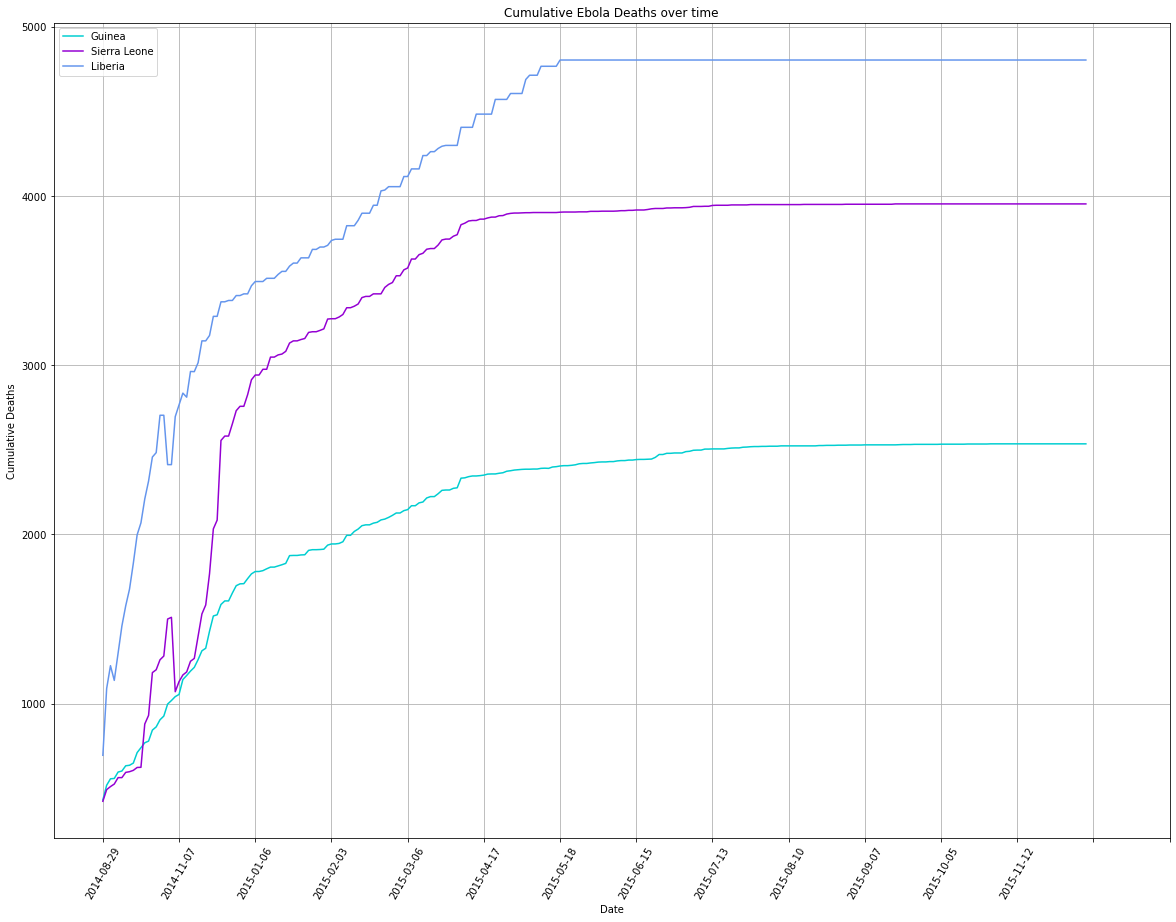

In [21]:
#Cumulative line graph of the number of deaths over time per country

#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_deaths
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")
#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_deaths= sierraleone_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_deaths
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")
#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=694]
liberia_deaths= liberia_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis4=liberia_df["Date"]
y_axis4=liberia_deaths
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")

plt.legend(loc="best")
plt.ylabel('Cumulative Deaths')
plt.xlabel("Date")
plt.title('Cumulative Ebola Deaths over time')
plt.xticks(np.arange(0, 300, step=20))
plt.xticks(rotation=60) 

plt.grid()
plt.show()

In [6]:
# pie chart of cases per country

In [7]:
#bar chart of total cases per country
top_three=['Liberia', 'Sierra Leone', 'Guinea']
ebola_countries_df=ebola_df[ebola_df.Country.isin(top_three)]
ebola_countries_df
total_cases= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
total_cases.to_frame()

,"Cumulative no. of confirmed, probable and suspected cases"
Country,
Guinea,3810.0
Liberia,10666.0
Sierra Leone,14122.0


Text(0.5, 1.0, 'Total ebola cases per country')

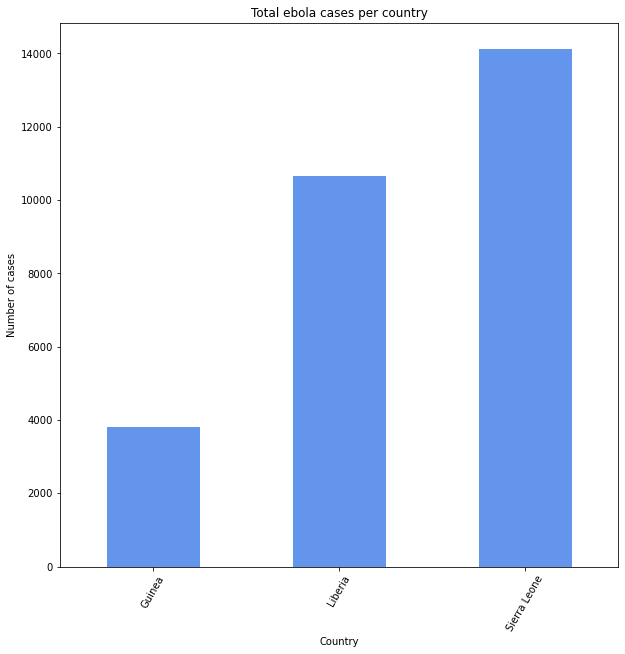

In [8]:
#bar graph
fig= plt.figure(figsize=(10,10))
total_cases.plot(kind="bar", color= 'cornflowerblue')
plt.xlabel("Country")
plt.xticks(rotation=60)
plt.ylabel("Number of cases")
plt.title("Total ebola cases per country")

In [9]:
total_deaths= ebola_countries_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
total_deaths.to_frame()

,"Cumulative no. of confirmed, probable and suspected deaths"
Country,
Guinea,2536.0
Liberia,4806.0
Sierra Leone,3955.0


Text(0.5, 1.0, 'Total ebola deaths per country')

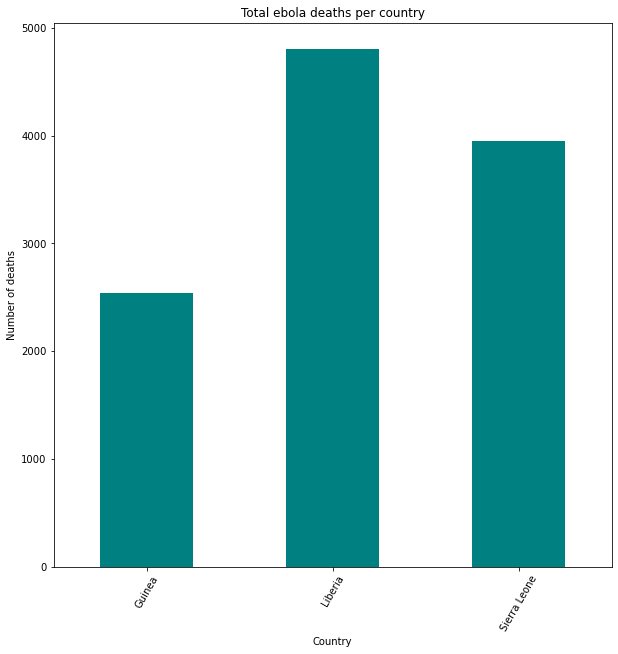

In [10]:
#bar chart deaths
fig= plt.figure(figsize=(10,10))
total_deaths.plot(kind="bar", color= 'teal')
plt.xlabel("Country")
plt.xticks(rotation=60)
plt.ylabel("Number of deaths")
plt.title("Total ebola deaths per country")

In [25]:
death_rate=(total_deaths/total_cases)*100
#death_rate.rename(columns={"0": "Death Rate Percent"})
#death_rate.columns = ['Country', 'Fatality Rate Percent']
death_rate.to_frame()
#death_rate.reset_index()
#death_rate.rename(columns={"0":"Death Rate Percentage"})

,0
Country,
Guinea,66.561680
Liberia,45.059066
Sierra Leone,28.005948


In [12]:
total_cases_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
total_cases_world.to_frame()

,"Cumulative no. of confirmed, probable and suspected cases"
Country,
Guinea,3810.0
Italy,1.0
Liberia,10666.0
Mali,8.0
Nigeria,22.0
Senegal,3.0
Sierra Leone,14122.0
Spain,1.0
United Kingdom,1.0


In [13]:
total_cases_sum= total_cases_world.sum()
total_cases_sum

28638.0

In [14]:
total_deaths_world= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected deaths"].max()
total_deaths_world.to_frame()

,"Cumulative no. of confirmed, probable and suspected deaths"
Country,
Guinea,2536.0
Italy,0.0
Liberia,4806.0
Mali,6.0
Nigeria,8.0
Senegal,0.0
Sierra Leone,3955.0
Spain,0.0
United Kingdom,0.0


In [15]:
total_deaths_sum= total_deaths_world.sum()
total_deaths_sum

11312.0

In [16]:
avg_death_rate= (total_deaths_sum/total_cases_sum)*100
avg_death_rate.round(2)

39.5

In [17]:
ebola_pop = pd.read_csv('Resources/Population by country.csv')
ebola_pop
ebola_pop.rename(columns={"Country Name":"Country"})

,Country,Population (2014)
0,Spain,46480882
1,United Kingdom,64602298
2,Guinea,11150977
3,Italy,60789140
4,Liberia,4359505
5,Mali,16934220
6,Nigeria,176404902
7,Senegal,14174731
8,Sierra Leone,7017144
9,United States of America,318301008


In [18]:

data = {'Country':['Guinea', 'Liberia', 'Sierra Leone'],
        'Cases':[3810, 10666, 14122],
        'Deaths':[2536,4806,3955],
        'Population':[11150977,4359505 ,7017144 ]}                 

# Create DataFrame
cases_per_pop = pd.DataFrame(data)
cases_per_pop

cases_pop_df=cases_per_pop
cases_pop_df['Cases per 10,000 population']= ""
cases_pop_df['Deaths per 10,000 population']= ""
cases_pop_df       



,Country,Cases,Deaths,Population,"Cases per 10,000 population","Deaths per 10,000 population"
0,Guinea,3810,2536,11150977,,
1,Liberia,10666,4806,4359505,,
2,Sierra Leone,14122,3955,7017144,,


In [19]:
cases_pop_df['Cases per 10,000 population']= ((cases_pop_df['Cases'])/(cases_pop_df['Population']))*10000
cases_pop_df['Deaths per 10,000 population']= ((cases_pop_df['Deaths'])/(cases_pop_df['Population']))*10000
cases_pop_df.round(2)

,Country,Cases,Deaths,Population,"Cases per 10,000 population","Deaths per 10,000 population"
0,Guinea,3810,2536,11150977,3.42,2.27
1,Liberia,10666,4806,4359505,24.47,11.02
2,Sierra Leone,14122,3955,7017144,20.12,5.64


In [20]:
#erged_df= pd.merge(ebola_df,ebola_pop,left_on=None)
#merged_df= pd.merge(ebola_df,ebola_pop, left_on=None,how="inner")

Ebola is spread through direct contact with body fluids of an infected person. It is not airborne and cannot be spread until a person is showing syptoms of ebola